In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Houses.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
display(df.head(2))
print (df.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


(1460, 81)


In [13]:
df.drop(["Id"],axis=1, inplace = True)

In [14]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniqe": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,int64,object,float64,int64,object,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64
Num_Uniqe,15,5,110,1073,2,2,4,4,2,5,...,8,3,4,4,21,12,5,9,6,663


In [15]:
cols_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,...,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,...,8,3,4,4,21,12,5,9,6,663


In [18]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,...,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,...,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
c1 = "MasVnrType MasVnrArea Electrical".split()
df.dropna(subset=c1, inplace=True)

In [22]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,121.000000,0.0,0.0,575.000000,0.0,0.0,0.0,0.0,...,0.0,585.000000,495.000000,574.00000,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.205782,0.0,0.0,0.977891,0.0,0.0,0.0,0.0,...,0.0,0.994898,0.841837,0.97619,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])

In [24]:
df.fillna(modes, inplace=True)

In [25]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,121.000000,0.0,0.0,575.000000,0.0,0.0,0.0,0.0,...,0.0,585.000000,495.000000,574.00000,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.205782,0.0,0.0,0.977891,0.0,0.0,0.0,0.0,...,0.0,0.994898,0.841837,0.97619,0.0,0.0,0.0,0.0,0.0,0.0


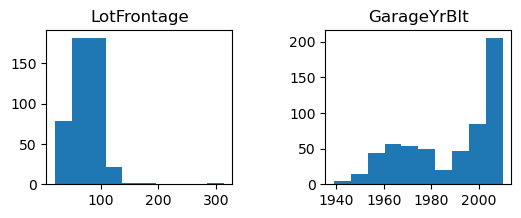

In [26]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

In [27]:
c2 = ["LotFrontage", "GarageYrBlt"]
medians = dict(df[c2].median())
medians

{'LotFrontage': np.float64(76.0), 'GarageYrBlt': np.float64(1995.5)}

In [28]:
df.fillna(medians, inplace=True)

In [29]:
c3 = "Alley FireplaceQu PoolQC Fence MiscFeature".split()
df.drop(c3, axis=1, inplace=True)

In [30]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

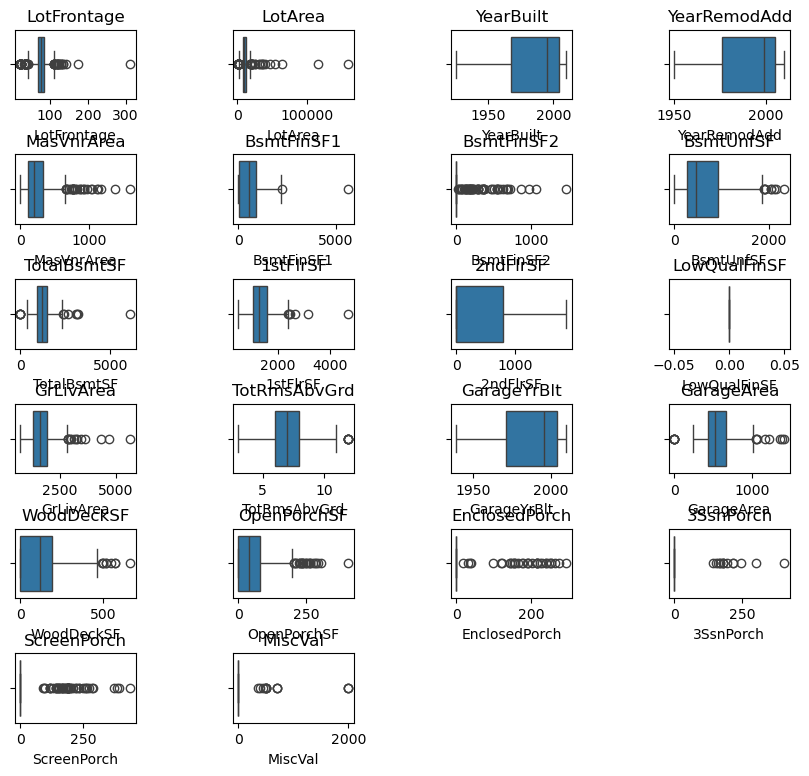

In [32]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [33]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_11116\3559815194.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(upper_outliers, upper, inplace=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_11116\3559815194.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [34]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_11116\2979313192.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(outliers, mode, inplace=True)
C:\Users\Home\AppData\Local\Temp\ipykernel_11116\2979313192.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col].replace(outliers, mode, inplace=True)

In [35]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

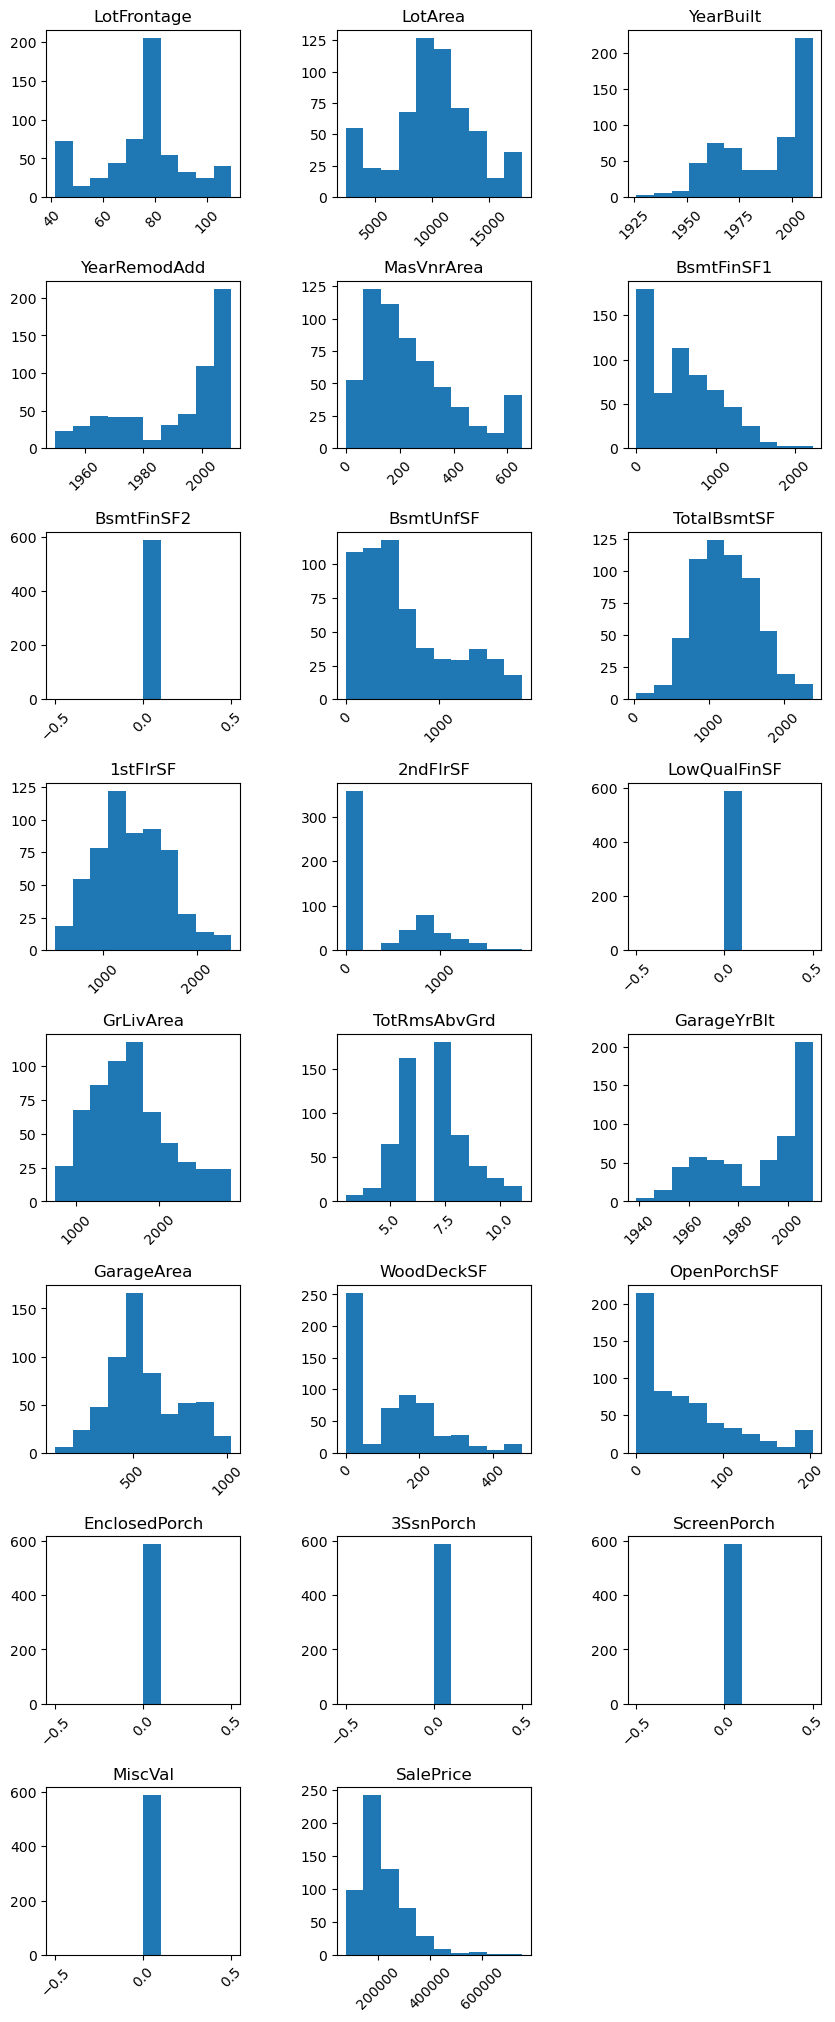

In [36]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [37]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

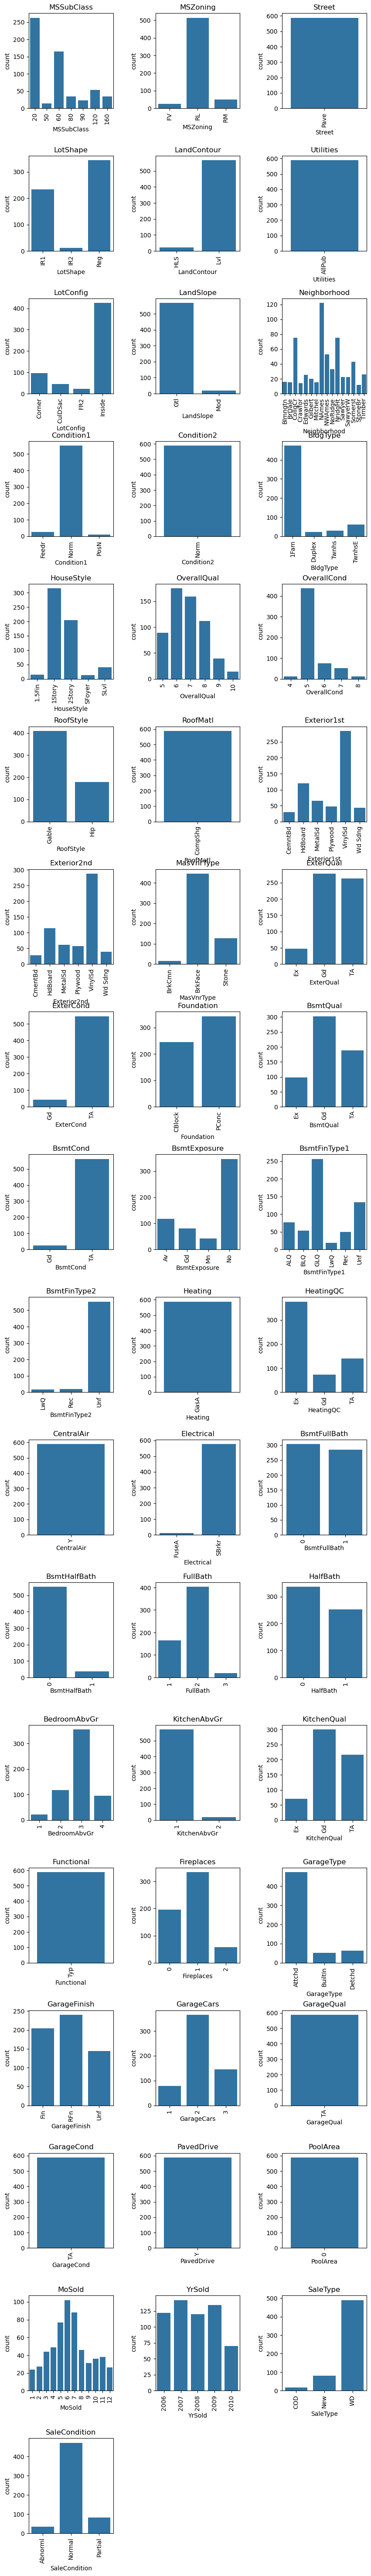

In [39]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [40]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

In [41]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
X, y = df.iloc[:, :-1], df.iloc[:, -1:]

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
num_cols = X.select_dtypes("number").columns 

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [46]:
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Foundation', 'GarageType', 'GarageFinish']

In [47]:
nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
pd.DataFrame(X[nominal_cols].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType
0,3,3,2,4,16,5,2,6,6,3


In [48]:
binary_cols = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']
onehot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'RoofStyle', 'MasVnrType']

In [49]:
labels = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},  
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Foundation': {'PConc': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'Stone': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
}

In [50]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

In [51]:
from category_encoders import OneHotEncoder

ModuleNotFoundError: No module named 'category_encoders'